In [21]:
# Import libraries and dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# Adjust pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent truncation


df = pd.read_csv('/Users/joezhou/Downloads/Mentum Assignment Data/Customer-churn-records.csv',sep=",")



In [22]:
# Preprocessing from assignment 1


# Convert categorical variables into numerical variables to understand relationship to churn for correlation analysis

# Drop columns that are not needed (e.g., RowNumber, CustomerId, Surname)
# Note: drop complain variable due to perfect correlation with churn, skewing the model

df.drop(columns=['RowNumber', 'CustomerId', 'Surname','Complain'], inplace=True)

df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Card Type'], drop_first=False)
# Identify and convert boolean columns to integers
bool_columns = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)
# Note: drop some encoded variables that are binary in nature to remove data noise
df_encoded.drop(columns=['HasCrCard_0','IsActiveMember_0'], inplace=True)

# create new feature to capture $0 balances, based on assignment 1 findings
df_encoded['Flag_Null_Balance'] = df_encoded['Balance'].apply(lambda x: 1 if x == 0 else 0)




In [3]:
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_NSW,Geography_QLD,Geography_VIC,Gender_Female,Gender_Male,HasCrCard_1,IsActiveMember_1,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Flag_Null_Balance
0,619,42,2,0.00,1,101348.88,1,1,2,464,1,0,0,1,0,1,1,1,0,0,0,1
1,608,41,1,83807.86,1,112542.58,0,1,3,456,0,1,0,1,0,0,1,1,0,0,0,0
2,502,42,8,159660.80,3,113931.57,1,1,3,377,1,0,0,1,0,1,0,1,0,0,0,0
3,699,39,1,0.00,2,93826.63,0,0,5,350,1,0,0,1,0,0,0,0,1,0,0,1
4,850,43,2,125510.82,1,79084.10,0,0,5,425,0,1,0,1,0,1,1,0,1,0,0,0


In [24]:
# Import modelling libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Split data into training and test for model development

# Features (X) and target (y)
X = df_encoded.drop('Exited', axis=1)  # Features
y = df_encoded['Exited']  # Target variable

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Accuracy: 0.8153333333333334
Confusion Matrix:
[[2324   92]
 [ 462  122]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.57      0.21      0.31       584

    accuracy                           0.82      3000
   macro avg       0.70      0.59      0.60      3000
weighted avg       0.78      0.82      0.78      3000

               Feature  Coefficient  Absolute Coefficient
1                  Age     0.749743              0.749743
14    IsActiveMember_1    -0.524625              0.524625
10       Geography_VIC     0.215075              0.215075
12         Gender_Male    -0.130777              0.130777
11       Gender_Female     0.130777              0.130777
8        Geography_NSW    -0.124380              0.124380
19   Flag_Null_Balance    -0.121037              0.121037
0          CreditScore    -0.075696              0.075696
3              Balance     0.071626              0.071

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


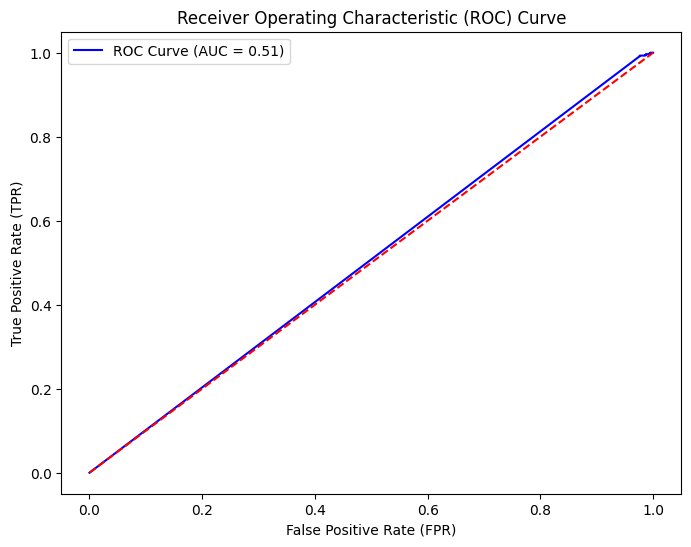

In [25]:
# Part 1.1: Logistic regression model

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# supporting material for p
# Feature importance (coefficients)
# coefficients = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coefficient'])
# coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
# print(coefficients)

# Extracting coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print(coefficients)

# Identify the coefficients
coefficients = log_reg.coef_[0]

# Get feature names after preprocessing
feature_names = num_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))


# Create a dataframe of feature importance
# coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# # Sort by absolute value of coefficients
# coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
# coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# # Plot coefficient chart
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Coefficient', y='Feature', data=coef_df)
# plt.title('Logistic Regression Coefficients by Feature Importance')
# plt.show()

# # Feature importance
# print(coef_df[['Feature', 'Coefficient']])

# ROC curve
y_probs = log_reg.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()


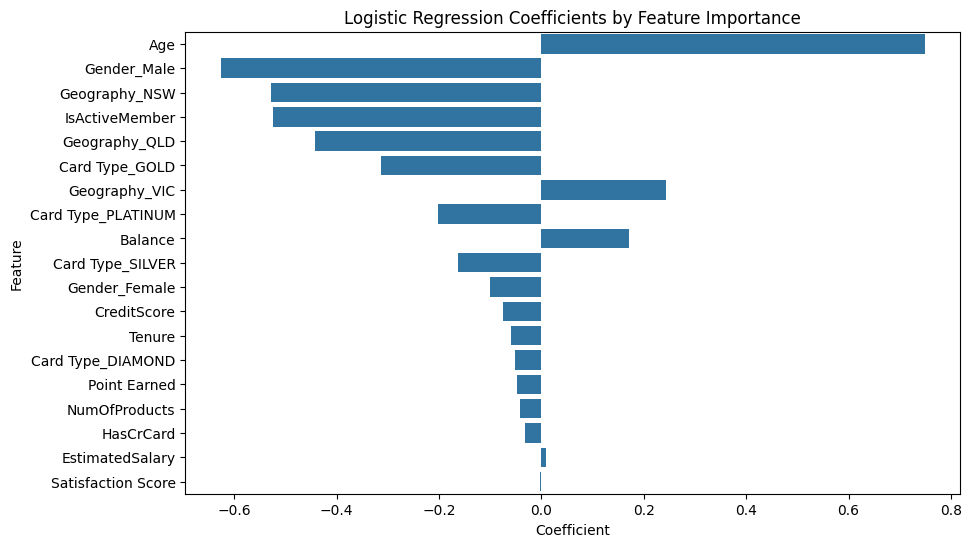

               Feature  Coefficient
1                  Age     0.749474
14         Gender_Male    -0.626694
10       Geography_NSW    -0.528143
6       IsActiveMember    -0.524445
11       Geography_QLD    -0.442674
16      Card Type_GOLD    -0.312435
12       Geography_VIC     0.243244
17  Card Type_PLATINUM    -0.200904
3              Balance     0.171558
18    Card Type_SILVER    -0.163293
13       Gender_Female    -0.100879
0          CreditScore    -0.075063
2               Tenure    -0.059681
15   Card Type_DIAMOND    -0.050941
9         Point Earned    -0.047287
4        NumOfProducts    -0.041295
5            HasCrCard    -0.031415
7      EstimatedSalary     0.008406
8   Satisfaction Score    -0.003454


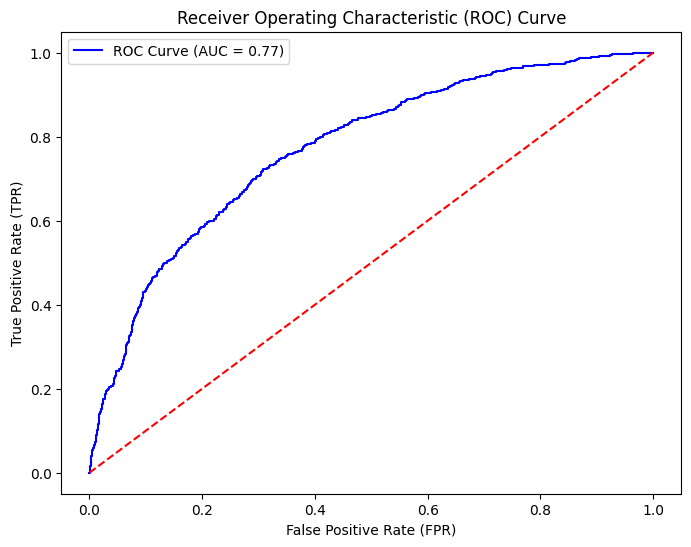

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset


# Preprocessing
# Drop columns that are not useful for the model (RowNumber, CustomerId, Surname)
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname','Complain'])

# Convert categorical columns using OneHotEncoder
categorical_cols = ['Geography', 'Gender', 'Card Type']
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

# Define the preprocessor: standardize numeric features, one-hot encode categorical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), categorical_cols)])

# Separate features and target variable
X = df.drop(columns='Exited')
y = df['Exited']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply transformations to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Identify the coefficients
coefficients = log_reg.coef_[0]

# Get feature names after preprocessing
feature_names = num_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Create a dataframe of feature importance
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficients
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot coefficient chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Logistic Regression Coefficients by Feature Importance')
plt.show()

# Feature importance
print(coef_df[['Feature', 'Coefficient']])

# ROC curve
y_probs = log_reg.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()


In [ ]:
coefficients = df_encoded.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

In [ ]:
# Part 1.2: Random Forrest Model


# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder



# Features (X) and target (y)
X = df_encoded.drop('Exited', axis=1)  # Features
y = df_encoded['Exited']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)



In [ ]:
# Part 1.3: Gradient boost machines

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


# Features (X) and target (y)
X = df_encoded.drop('Exited', axis=1)  # Features
y = df_encoded['Exited']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)



In [ ]:
# Part 1.4: Decision Tree

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np


# Features (X) and target (y)
X = df_encoded.drop('Exited', axis=1)  # Features
y = df_encoded['Exited']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Feature Importance - Sorting by most important
feature_importance = dt_classifier.feature_importances_
features = X.columns

# Create a sorted list of features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = features[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# Print sorted feature importance
print("Sorted Feature Importance:")
for feature, importance in zip(sorted_features, sorted_importance):
    print(f"{feature}: {importance:.4f}")

# Plot sorted feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()



# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=features, class_names=['Not Exited', 'Exited'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


# Print the decision tree structure as text
# tree_rules = export_text(dt_classifier, feature_names=list(features))
# print("Decision Tree Structure:")
# print(tree_rules)



In [ ]:
#Note: the 1st decision tree is large, selecting the top 10 variables for the next iteration

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np


# Features (X) and target (y)
X = df_encoded.drop('Exited', axis=1)  # Features
y = df_encoded['Exited']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initial Decision Tree Classifier to get feature importance
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Feature Importance - Sorting by most important
feature_importance = dt_classifier.feature_importances_
features = X.columns

# Set a threshold for feature importance (e.g., 0.01)
importance_threshold = 0.05

# Shortlist important features based on the threshold
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = features[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

important_features = sorted_features[sorted_importance >= importance_threshold]
important_importance = sorted_importance[sorted_importance >= importance_threshold]

# Print shortlisted important features
print(f"Shortlisted Important Features (Threshold: {importance_threshold}):")
for feature, importance in zip(important_features, important_importance):
    print(f"{feature}: {importance:.4f}")

# Plot shortlisted feature importance
plt.figure(figsize=(10, 6))
plt.barh(important_features, important_importance, color='lightgreen')
plt.xlabel('Importance')
plt.title(f'Shortlisted Feature Importance (Threshold: {importance_threshold})')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

# Train a new Decision Tree using only the shortlisted important features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Decision Tree with shortlisted important features
dt_classifier_important = DecisionTreeClassifier(random_state=42)
dt_classifier_important.fit(X_train_important, y_train)

# Make predictions
y_pred_important = dt_classifier_important.predict(X_test_important)

# Evaluate the model with shortlisted features
accuracy_important = accuracy_score(y_test, y_pred_important)
conf_matrix_important = confusion_matrix(y_test, y_pred_important)
class_report_important = classification_report(y_test, y_pred_important)

# Print the results for the model with shortlisted features
print(f"Accuracy with shortlisted features: {accuracy_important}")
print("Confusion Matrix with shortlisted features:")
print(conf_matrix_important)
print("Classification Report with shortlisted features:")
print(class_report_important)

# Plot the decision tree with the shortlisted important features
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier_important, feature_names=important_features, class_names=['Not Exited', 'Exited'], filled=True, rounded=True)
plt.title("Decision Tree Visualization with Shortlisted Features")
plt.show()



In [ ]:
# Apply hyper tuninng

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np



# Features (X) and target (y)
X = df_encoded.drop('Exited', axis=1)  # Features
y = df_encoded['Exited']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initial Decision Tree Classifier to get feature importance
dt_classifier = DecisionTreeClassifier(    random_state=42,
                                            max_depth=2,               # Limit the depth of the tree
                                            min_samples_split=10,      # Minimum samples required to split a node
                                            min_samples_leaf=5,        # Minimum samples required at a leaf node
                                            max_leaf_nodes=5          # Limit the number of leaf nodes
                                        )




dt_classifier.fit(X_train_scaled, y_train)

# Feature Importance - Sorting by most important
feature_importance = dt_classifier.feature_importances_
features = X.columns

# Set a threshold for feature importance
importance_threshold = 0.11

# Shortlist important features based on the threshold
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = features[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

important_features = sorted_features[sorted_importance >= importance_threshold]
important_importance = sorted_importance[sorted_importance >= importance_threshold]

# Manually dropping some variables from the shortlisted features
manual_drops = ['EstimatedSalary', 'Complain']  # Add or remove variables to drop
important_features_filtered = [feat for feat in important_features if feat not in manual_drops]

# Print shortlisted important features after manual dropping
print(f"Shortlisted Important Features (after manual dropping, Threshold: {importance_threshold}):")
for feature in important_features_filtered:
    print(feature)

# Train a new Decision Tree using only the filtered important features
X_train_filtered = X_train[important_features_filtered]
X_test_filtered = X_test[important_features_filtered]

# Hyperparameter tuning using GridSearchCV
# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit the model to the training data with hyperparameter tuning
grid_search.fit(X_train_filtered, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters from GridSearchCV: {best_params}")

# Train the final model with the best parameters
best_dt_classifier = grid_search.best_estimator_

# Make predictions
y_pred_filtered = best_dt_classifier.predict(X_test_filtered)

# Evaluate the model with the optimized hyperparameters
accuracy_filtered = accuracy_score(y_test, y_pred_filtered)
conf_matrix_filtered = confusion_matrix(y_test, y_pred_filtered)
class_report_filtered = classification_report(y_test, y_pred_filtered)

# Print the results for the model with optimized hyperparameters
print(f"Accuracy with filtered important features and optimized hyperparameters: {accuracy_filtered}")
print("Confusion Matrix with filtered important features:")
print(conf_matrix_filtered)
print("Classification Report with filtered important features:")
print(class_report_filtered)

# Plot the decision tree with the filtered important features and optimized parameters
plt.figure(figsize=(30, 20))
plot_tree(best_dt_classifier, feature_names=important_features_filtered, class_names=['Not Exited', 'Exited'], filled=True, rounded=True)
plt.title("Decision Tree Visualization with Filtered Important Features (Optimized Hyperparameters)")
plt.show()




In [ ]:
# Part 1:
    # explore logistic regression and ensemble models like Random Forests and Gradient Boosting Machines (GBMs). 
    # Use these models to predict customer churn and compare their performance to each other.
# Evaluate the performance of your models using ROC/AUC, precision, and recall, and visualise these metrics for easier interpretation. 
# Check for signs of over- or underfitting and data leakage.

In [ ]:
# Part 2
# Now it’s time to improve your models. 
    # Apply hyperparameter tuning to optimise the parameters of your models. 
# Experiment with feature engineering techniques to create new features from the existing data. 
# Consider if data quality enhancements or sampling techniques could help improve your model's performance.


In [ ]:
# Part 3
# Focus on maintaining the quality of your model. 
# Outline an approach for monitoring your model's performance over time and detect any drift in the underlying data. Also, start thinking about how to communicate your findings.
# Create visualisations that clearly and effectively communicate your model's performance and the key factors contributing to customer churn. Save these to your Python notebook.



In [ ]:
# Part 3: Model Monitoring

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import datetime


# Features (X) and target (y)
X = df_encoded.drop('Exited', axis=1)  # Features
y = df_encoded['Exited']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables (for models like DecisionTree, standardization is not mandatory, but let's do it for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a basic Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Function to evaluate the model's performance on new data
def evaluate_model(model, X_new, y_true):
    # Predict the target for the new data
    y_pred = model.predict(X_new)
    y_proba = model.predict_proba(X_new)[:, 1]  # Probabilities for ROC-AUC
    
    # Calculate performance metrics
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_proba)
    }
    
    return metrics

# Function to monitor performance over time
def monitor_performance(model, X_new, y_true, performance_log='model_performance_log.csv'):
    # Get the current date and time
    timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    
    # Evaluate the model on the new data
    metrics = evaluate_model(model, X_new, y_true)
    
    # Append the metrics to a DataFrame (for logging)
    df_metrics = pd.DataFrame([metrics], index=[timestamp])
    
    # Check if the log file exists, if not, create it
    try:
        performance_log_df = pd.read_csv(performance_log, index_col=0)
        # Append the new metrics
        performance_log_df = pd.concat([performance_log_df, df_metrics])
    except FileNotFoundError:
        # If no log exists, start a new one
        performance_log_df = df_metrics
    
    # Save the updated log back to the file
    performance_log_df.to_csv(performance_log)
    
    print(f"Metrics logged at {timestamp}:")
    print(df_metrics)
    
    return performance_log_df

# Function to plot performance metrics over time
def plot_performance_over_time(performance_log='model_performance_log.csv'):
    # Load the performance log
    performance_log_df = pd.read_csv(performance_log, index_col=0)
    
    # Plot the performance metrics
    plt.figure(figsize=(10, 6))
    for metric in performance_log_df.columns:
        plt.plot(performance_log_df.index, performance_log_df[metric], label=metric)
    
    plt.xlabel('Timestamp')
    plt.ylabel('Performance Metrics')
    plt.title('Model Performance Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'model' is your trained classifier and X_new, y_true are new data

# Monitor performance with new data (X_test_scaled and y_test)
performance_log_df = monitor_performance(model, X_test_scaled, y_test)

# Plot performance over time
plot_performance_over_time()
